In [1]:
import jax
from jax.config import config
config.update("jax_enable_x64", True)

2023-02-13 09:20:56.057654: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 09:21:08.138965: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-13 09:21:08.978907: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


In [2]:
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import moscot.plotting as mpl
import pandas as pd
import os
from anndata import AnnData
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=200)

import mplscience

mplscience.available_styles()
mplscience.set_style(reset_current=True)
plt.rcParams['legend.scatterpoints'] = 1 

2023-02-13 09:22:55.335359: W external/org_tensorflow/tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-13 09:22:55.340683: W external/org_tensorflow/tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)


['default', 'despine']


In [3]:
output_dir = "/lustre/groups/ml01/workspace/moscot_paper/pancreas/driver_features"

In [4]:
chromvar_features = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/cisBP_chromvar_annotations_reduced.csv")

In [5]:
chromvar_features.set_index("Unnamed: 0", inplace=True)

In [6]:
chromvar_features = chromvar_features.T

In [7]:
chromvar_features["old_index"] = chromvar_features.index

In [8]:
def rename_index(x):
    split = x["old_index"].split("_")
    if split[0] == "E14-5":
        return split[1]+"-0"
    if split[0] == "E15-5":
        return split[1]+"-1"
    raise ValueError("Pattern does not match: ", split)

In [9]:
chromvar_features["index_adapted"] = chromvar_features.apply(rename_index ,axis=1)

In [10]:
chromvar_features.set_index("index_adapted", inplace=True)

In [11]:
motif2TF = pd.read_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/motif2TF.csv")

In [12]:
motif2TF["TF_name"] = motif2TF.apply(lambda x: x["TF_Name"].replace("[", "").replace("]", "").replace("'", "").split(), axis=1)

In [13]:
del motif2TF["TF_Name"]

In [14]:
del chromvar_features["old_index"]

In [15]:
chromvar_features.head()

Unnamed: 0,new motif,new motif.1,new motif.2,new motif.3,new motif.4,new motif.5,new motif.6,new motif.7,new motif.8,new motif.9,...,new motif.6004,new motif.6005,new motif.6006,new motif.6007,new motif.6008,new motif.6009,new motif.6010,new motif.6011,new motif.6012,new motif.6013
index_adapted,,,,,,,,,,,,,,,,,,,,,
AAACAGCCAACAGCCT-1-0,1.449150,-1.548024,0.127186,-0.401432,5.779336,-0.047665,-0.104796,0.082138,-0.065305,-0.163256,...,-1.134490,0.531467,-0.404171,-2.334780,0.179397,-0.388121,0.772678,0.357471,0.428473,0.772678
AAACAGCCAACCCTCC-1-0,-0.986286,3.096357,2.472101,0.594340,5.514991,1.100158,-0.874710,-0.670196,0.534449,-0.349137,...,-1.157848,-1.993996,0.308834,-1.702847,-1.646581,1.172381,0.286935,-0.433321,2.500077,0.286935
AAACAGCCACCTGTAA-1-0,2.217122,-0.694262,-1.776413,-0.556984,-0.999821,-1.439918,-0.359144,0.231731,-1.116241,-0.331855,...,1.615487,-0.255339,-1.269120,2.926865,0.709345,0.389420,-1.620937,-1.635631,-0.787535,-1.620937
AAACAGCCACTAAGCC-1-0,1.043075,1.337077,-0.491503,1.104463,5.234869,-0.295337,0.489305,-1.783421,-1.110079,-0.149686,...,-0.439479,-0.452744,-1.027292,-2.424418,-0.645681,-0.100782,2.136637,0.185030,0.231816,2.136637
AAACAGCCAGGATAAC-1-0,0.537357,-0.343018,-1.047688,-1.379141,0.126564,-0.931787,-0.365652,-1.572852,-1.259440,-1.114664,...,0.704474,-0.813751,-1.530833,-0.959602,-1.077125,-1.498234,1.009304,1.857225,1.016590,1.009304


In [16]:
motifs = motif2TF["Motif_ID"].values
rename_cols = {col: motifs[i] for i, col in enumerate(chromvar_features.columns)}

In [17]:
chromvar_features.rename(columns=rename_cols, inplace=True)

In [18]:
chromvar_features.to_csv("/lustre/groups/ml01/workspace/moscot_paper/pancreas/cisBP_chromvar_features_processed.csv")

In [19]:
motif2TF.head()

,Motif_ID,direct_TF,TF_name
0,M00008_2.00,NaN,"[Setbp1, Ahctf1, Hmga1, Hmga2, Phf21a, Hmga1-rs1]"
1,M00044_2.00,NaN,[Foxp3]
2,M00056_2.00,NaN,"[A1JVI6_MOUSE, Sebox, Phox2a, Phox2b, Alx3, Vs..."
3,M00060_2.00,NaN,"[Hsf2, Hsf4]"
4,M00066_2.00,NaN,"[Rfx4, Rfx2, Rfx1, Rfx3]"


In [20]:
motif2TF_dict = pd.Series(motif2TF["TF_name"].values,index=motif2TF["Motif_ID"].values).to_dict()
motif2TF_direct_dict = pd.Series(motif2TF["direct_TF"].values,index=motif2TF["Motif_ID"].values).to_dict()

In [21]:
tp0 = TemporalProblem.load("/lustre/groups/ml01/workspace/moscot_paper/pancreas/TemporalProblem.pkl")

In [22]:
tp0.adata.var["total_counts"] = tp0.adata.X.sum(axis=0).T

In [23]:
tp0.adata.obs = tp0.adata.obs.merge(chromvar_features, left_index=True, right_index=True)

In [24]:
order_celltypes = ['Ngn3 low', 'Ngn3 high cycling', 'Ngn3 high,0', 'Ngn3 high,1', 'Eps. progenitors', 'Fev+', 'Fev+ Alpha', 
                   'Fev+ Beta', 'Fev+ Delta,0', 'Fev+ Delta,1', 'Alpha', 'Beta', 'Delta', 'Epsilon']

In [25]:
tp0.adata.obs["refinement"] = tp0.adata.obs["refinement"].cat.reorder_categories(order_celltypes)

In [26]:
color_dict = { 'Prlf. Ductal': '#f7b6d2', 'Ductal': '#d62728', 'Imm. Acinar': '#ffeb3b', 'Mat. Acinar': '#98df8a',
    'Alpha': '#1f77b4', 'Beta': '#ff7f0e', 'Delta': '#279e68', 'Eps. progenitors': '#aa40fc', 'Epsilon': '#8c564b',
       'Fev+': '#e377c2', 'Fev+ Alpha': '#b5bd61', 'Fev+ Beta': '#aec7e8', 'Fev+ Delta': '#aec7e8', 'Fev+ Delta,0': '#17becf', 'Fev+ Delta,1':'#98df8a',
        'Ngn3 high cycling': '#aec7e8',
        'Ngn3 high,0': '#ff9896', 'Ngn3 high': '#ff9896', 'Ngn3 high,1':'#f0b98d', 'Ngn3 low': '#c5b0d5'
}

In [27]:
tp0.adata.obs["refinement"] = tp0.adata.obs["refinement"].astype("category")
tp0.adata.uns["refinement_colors"] = [color_dict[ct] for ct in tp0.adata.obs["refinement"].cat.categories]

In [28]:
annotation1 = {"celltype": ["Alpha", "Beta", "Epsilon", "Delta", "Fev+ Alpha", "Fev+ Beta", "Fev+ Delta", "Eps. progenitors"]}
annotation2 = {"celltype": ["Delta", "Fev+ Delta", "Eps. progenitors", "Ngn3 high"]}
annotation3 = {"celltype": ["Epsilon", "Fev+ Delta", "Eps. progenitors", "Ngn3 high", "Alpha"]}
annotation4 = {"celltype": ["Epsilon", "Fev+ Delta", "Eps. progenitors", "Ngn3 high"]}

In [29]:
chromvar_features = [col for col in tp0.adata.obs.columns if col.startswith("M")]

In [30]:
len(chromvar_features)

6014

In [31]:
adata_chromvar = AnnData(X=tp0.adata.obs[chromvar_features].values, obs=list(tp0.adata.obs_names), var=chromvar_features)
adata_chromvar.obs= tp0.adata.obs.copy()
adata_chromvar.var_names = chromvar_features

/tmp/ipykernel_290950/3340400638.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_chromvar = AnnData(X=tp0.adata.obs[chromvar_features].values, obs=list(tp0.adata.obs_names), var=chromvar_features)


In [32]:
adata_chromvar.X = adata_chromvar.X + 10 # needed as mean of some motif scores is negative, hence log-fold change cannot be computed. Doesn't affect rank-based test results.


In [33]:
adata_chromvar = adata_chromvar[adata_chromvar.obs["celltype"]!="Ngn3 low"].copy()

In [34]:
sc.tl.rank_genes_groups(adata_chromvar, groupby="refinement", method="wilcoxon")

In [35]:
sc.pp.normalize_total(tp0.adata)
sc.pp.log1p(tp0.adata)

# Delta

In [36]:
tp0.pull(14.5, 15.5, data="refinement", subset="Delta", key_added="Delta_pull")

In [37]:
delta_drivers = tp0.compute_feature_correlation(obs_key="Delta_pull", features="mouse", corr_method="pearson")
delta_drivers["total_counts"] = tp0.adata.var["total_counts"]
delta_drivers = delta_drivers[delta_drivers.total_counts > 500]
delta_drivers.head(n=10)

,Delta_pull_corr,Delta_pull_pval,Delta_pull_qval,Delta_pull_ci_low,Delta_pull_ci_high,total_counts
Hhex,0.443365,0.000000e+00,0.000000e+00,0.426945,0.459492,1989.0
Arg1,0.246119,1.429707e-130,6.328837e-128,0.226997,0.265052,1861.0
Isl1,0.216741,9.312846e-101,3.091865e-98,0.197354,0.235959,28610.0
Meis2,0.130892,3.643560e-37,8.064413e-35,0.110932,0.150746,79111.0
Zbtb20,0.090560,1.543668e-18,1.863628e-16,0.070436,0.110611,92215.0
Ikzf2,0.086789,3.808495e-17,3.890524e-15,0.066652,0.106855,2104.0
Jazf1,0.085469,1.132296e-16,1.002459e-14,0.065329,0.105540,12106.0
Peg3,0.082316,1.431172e-15,1.117998e-13,0.062166,0.102399,136951.0
Rora,0.076398,1.296815e-13,9.567611e-12,0.056231,0.096502,20502.0
Pax6,0.074603,4.764867e-13,3.330391e-11,0.054432,0.094714,25098.0


In [38]:
ranks_delta = sc.get.rank_genes_groups_df(adata_chromvar, group="Delta")
df_delta = pd.merge(ranks_delta, motif2TF, left_on="names", right_on="Motif_ID")
df_delta.head()

,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
0,M09128_2.00,10.702626,4.075255,9.893420e-27,5.219213e-25,M09128_2.00,NaN,"[Sebox, Shox2, Isl2, Vsx1, Isl1, Noto]"
1,M09209_2.00,10.702626,4.075255,9.893420e-27,5.219213e-25,M09209_2.00,Isl1,"[Sebox, Shox2, Isl2, Vsx1, Isl1, Noto]"
2,M00381_2.00,10.368246,3.037195,3.458139e-25,1.359297e-23,M00381_2.00,Hoxb6,"[Hoxb6, Hoxa10, Hoxa4, Mnx1, Hoxc8, Hoxc6, Hox..."
3,M05256_2.00,9.815386,2.613800,9.666745e-23,2.863833e-21,M05256_2.00,NaN,"[Nkx3-1, Nkx3-2]"
4,M05204_2.00,9.786180,2.961652,1.290796e-22,3.786754e-21,M05204_2.00,NaN,"[Sebox, Shox2, Isl2, Vsx1, Isl1, Noto]"


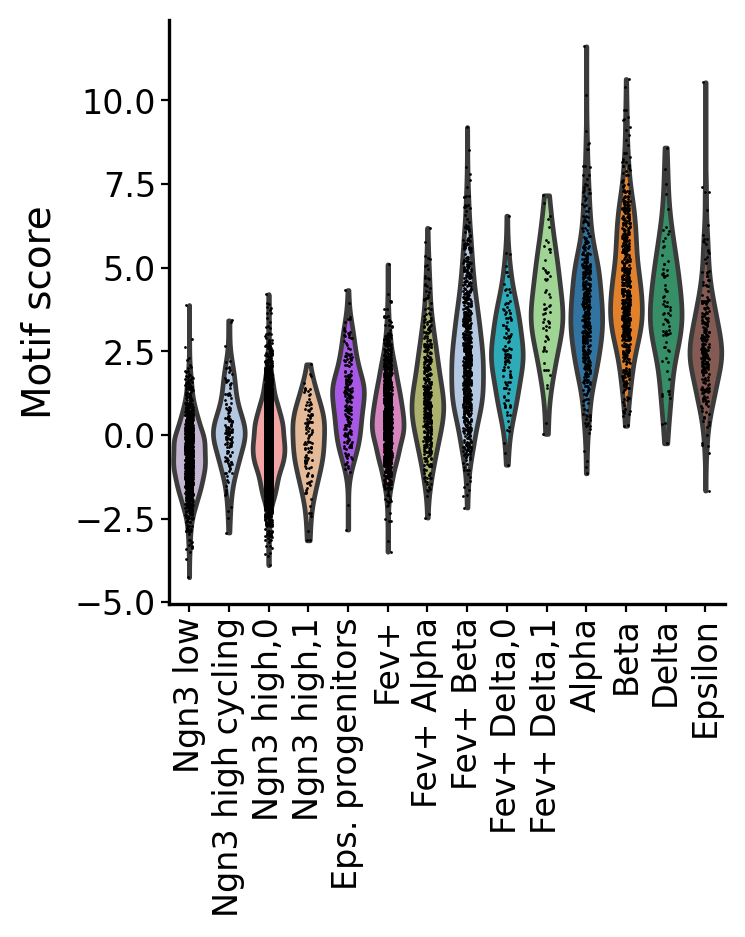

In [39]:
sc.pl.violin(tp0.adata, keys="M09209_2.00", groupby="refinement", ncols=1, rotation=90, ylabel="Motif score")

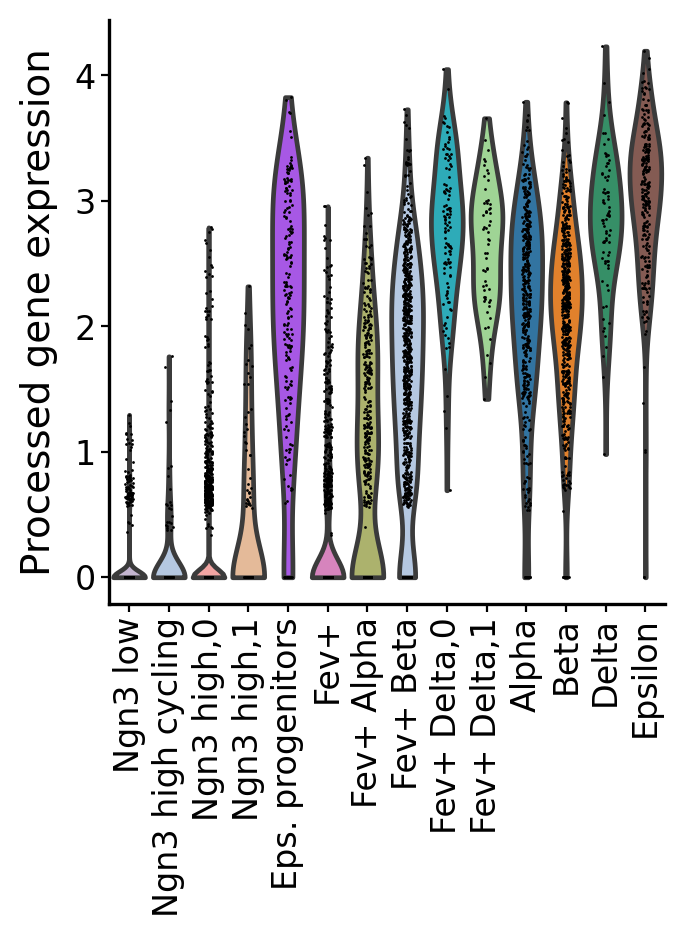

In [40]:
sc.pl.violin(tp0.adata, keys="Isl1", groupby="refinement", ncols=1, rotation=90, ylabel="Processed gene expression")

In [41]:
delta_drivers.to_csv(os.path.join(output_dir, "driver_delta_tfs.csv"))
df_delta.to_csv(os.path.join(output_dir, "diff_motif_delta.csv"))

# Beta

In [42]:
tp0.pull(14.5, 15.5, data="celltype", subset="Beta", key_added="Beta_pull")

In [43]:
beta_drivers = tp0.compute_feature_correlation(obs_key="Beta_pull", features="mouse", corr_method="pearson")
beta_drivers["total_counts"] = tp0.adata.var["total_counts"]
beta_drivers = beta_drivers[beta_drivers.total_counts > 500]
beta_drivers.head(n=20)

,Beta_pull_corr,Beta_pull_pval,Beta_pull_qval,Beta_pull_ci_low,Beta_pull_ci_high,total_counts
Mafb,0.592965,0.000000e+00,0.000000e+00,0.579673,0.605942,14566.0
Pdx1,0.526711,0.000000e+00,0.000000e+00,0.511918,0.541191,15115.0
Rora,0.505339,0.000000e+00,0.000000e+00,0.490102,0.520268,20502.0
Mlxipl,0.469430,0.000000e+00,0.000000e+00,0.453488,0.485072,9126.0
Mafa,0.433165,0.000000e+00,0.000000e+00,0.416566,0.449476,1945.0
Isl1,0.398405,0.000000e+00,0.000000e+00,0.381227,0.415307,28610.0
Pax6,0.394984,0.000000e+00,0.000000e+00,0.377752,0.411942,25098.0
Meis2,0.384271,0.000000e+00,0.000000e+00,0.366873,0.401401,79111.0
Hspa5,0.379903,0.000000e+00,0.000000e+00,0.362438,0.397101,69542.0
Mnx1,0.373971,0.000000e+00,0.000000e+00,0.356417,0.391261,1738.0


In [44]:
ranks_beta = sc.get.rank_genes_groups_df(adata_chromvar, group="Beta")
df_beta = pd.merge(ranks_beta, motif2TF, left_on="names", right_on="Motif_ID")
df_beta.head()



,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
0,M08835_2.00,35.613861,4.349932,8.548641e-278,2.570576e-274,M08835_2.00,Mafg,"[Mafk, Mafa, Mafg, Maf, Mafb]"
1,M08809_2.00,35.613861,4.349932,8.548641e-278,2.570576e-274,M08809_2.00,NaN,"[Mafk, Mafa, Mafg, Maf, Mafb]"
2,M08807_2.00,35.532864,4.304635,1.528416e-276,3.063965e-273,M08807_2.00,NaN,"[Mafk, Mafa, Mafg, Maf, Mafb]"
3,M08834_2.00,35.309116,4.281945,4.254973e-273,6.397351e-270,M08834_2.00,Maff,[Maff]
4,M02856_2.00,35.264488,4.454398,2.057865e-272,2.475200e-269,M02856_2.00,NaN,"[Mafk, Mafa, Mafg, Maf, Mafb]"


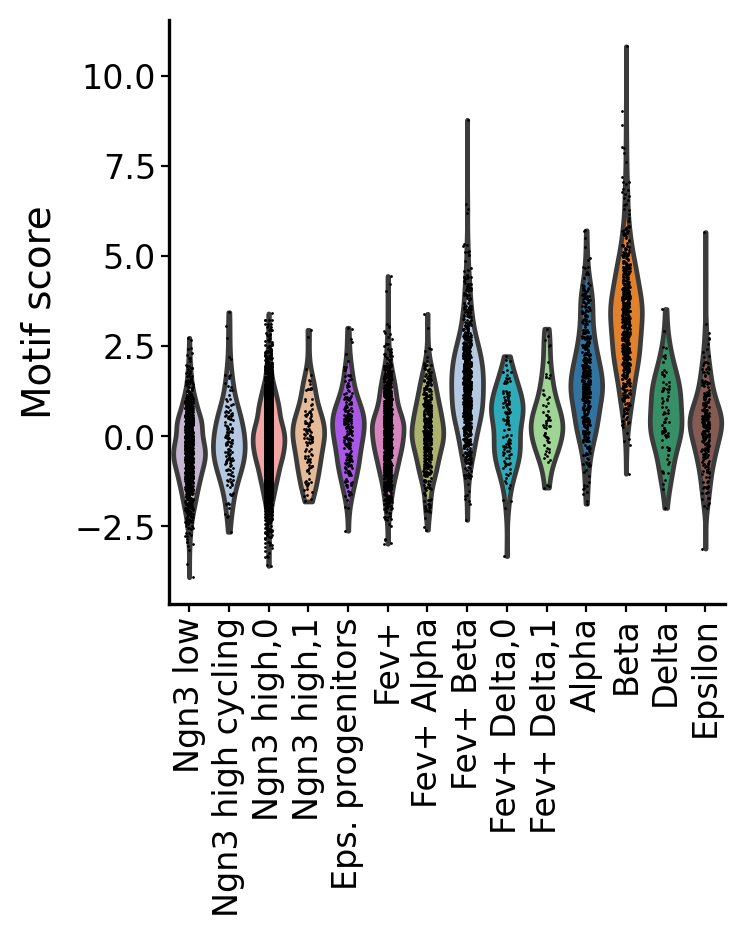

In [45]:
sc.pl.violin(tp0.adata, keys="M08835_2.00", groupby="refinement", ncols=1, rotation=90, ylabel="Motif score")

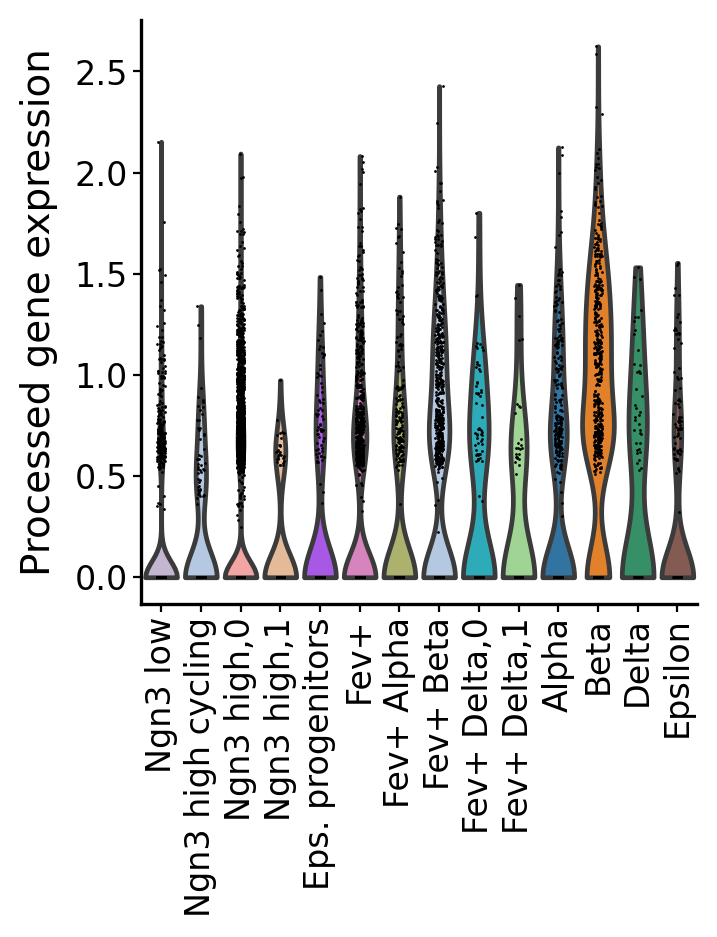

In [46]:
sc.pl.violin(tp0.adata, keys="Mafg", groupby="refinement", ncols=1, rotation=90, ylabel="Processed gene expression")

In [47]:
beta_drivers.to_csv(os.path.join(output_dir, "driver_beta_tfs.csv"))
df_beta.to_csv(os.path.join(output_dir, "diff_motif_beta.csv"))

# Alpha

In [48]:
tp0.pull(14.5, 15.5, data="celltype", subset="Alpha", key_added="Alpha_pull")

In [49]:
alpha_drivers = tp0.compute_feature_correlation(obs_key="Alpha_pull", features="mouse", corr_method="pearson")
alpha_drivers["total_counts"] = tp0.adata.var["total_counts"]
alpha_drivers = alpha_drivers[alpha_drivers.total_counts > 500]
alpha_drivers.head(n=20)

,Alpha_pull_corr,Alpha_pull_pval,Alpha_pull_qval,Alpha_pull_ci_low,Alpha_pull_ci_high,total_counts
Pou6f2,0.585137,0.000000e+00,0.000000e+00,0.571658,0.598300,1353.0
Irx2,0.568528,0.000000e+00,0.000000e+00,0.554661,0.582079,1968.0
Irx1,0.554180,0.000000e+00,0.000000e+00,0.539987,0.568058,1124.0
Mctp2,0.518002,0.000000e+00,0.000000e+00,0.503026,0.532668,5659.0
Smarca1,0.456324,0.000000e+00,0.000000e+00,0.440138,0.472213,16725.0
A1cf,0.374218,0.000000e+00,0.000000e+00,0.356667,0.391504,5833.0
Etv1,0.373724,0.000000e+00,0.000000e+00,0.356167,0.391018,9007.0
Meis2,0.363542,1.957562e-297,3.249553e-295,0.345835,0.380991,79111.0
Isl1,0.351103,9.644618e-276,1.423117e-273,0.333218,0.368734,28610.0
Arx,0.319881,9.384492e-226,1.246261e-223,0.301581,0.337945,8805.0


In [50]:
ranks_alpha = sc.get.rank_genes_groups_df(adata_chromvar, group="Alpha")
df_alpha = pd.merge(ranks_alpha, motif2TF, left_on="names", right_on="Motif_ID")
df_alpha.head(n=30)



,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
0,M03291_2.00,29.874126,5.938983,4.267546e-196,2.566502e-192,M03291_2.00,NaN,"[Pax2, Pax6]"
1,M05413_2.00,29.437401,4.818902,1.825157e-190,5.488247e-187,M05413_2.00,NaN,"[Pax2, Pax6]"
2,M03900_2.00,29.343796,5.281624,2.867360e-189,5.748102e-186,M03900_2.00,NaN,[Pax6]
3,M05436_2.00,29.136324,4.887123,1.245083e-186,1.871982e-183,M05436_2.00,NaN,[Pax4]
4,M03899_2.00,28.702795,4.517370,3.520810e-181,4.234830e-178,M03899_2.00,NaN,[Pax6]
5,M05412_2.00,28.487488,4.311203,1.673979e-178,1.677885e-175,M05412_2.00,NaN,"[Pax2, Pax6]"
6,M05414_2.00,28.393547,4.035178,2.429389e-177,2.087192e-174,M05414_2.00,NaN,"[Pax2, Pax6]"
7,M05415_2.00,28.144032,3.915867,2.835318e-174,2.131451e-171,M05415_2.00,NaN,"[Pax2, Pax6]"
8,M05435_2.00,27.763416,4.244650,1.200124e-169,7.217544e-167,M05435_2.00,NaN,[Pax4]
9,M05432_2.00,27.678123,3.994342,1.280552e-168,7.001126e-166,M05432_2.00,NaN,[Pax4]


In [51]:
df_alpha.loc[("Pou3f4" in df_alpha.iloc[i]["TF_name"] for i in range(len(df_alpha)))]

,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
62,M03318_2.00,24.701685,2.681583,1.025799e-134,6.108073e-133,M03318_2.00,NaN,[Pou3f4]
65,M05496_2.00,24.466290,2.882531,3.376358e-132,1.829317e-130,M05496_2.00,NaN,[Pou3f4]
67,M00366_2.00,24.394701,2.443038,1.946652e-131,1.018014e-129,M00366_2.00,NaN,[Pou3f4]
92,M03317_2.00,23.560966,2.559416,9.691216e-123,3.575643e-121,M03317_2.00,NaN,[Pou3f4]
94,M05492_2.00,23.445131,2.461362,1.482065e-121,5.182059e-120,M05492_2.00,NaN,[Pou3f4]
175,M05494_2.00,21.846016,2.277119,8.481866e-106,1.609146e-104,M05494_2.00,NaN,[Pou3f4]
180,M05500_2.00,21.640644,2.236586,7.445486e-104,1.348709e-102,M05500_2.00,NaN,[Pou3f4]
279,M05498_2.00,19.330776,1.797352,2.959359e-83,3.178140e-82,M05498_2.00,NaN,[Pou3f4]
287,M05493_2.00,19.232084,1.966838,1.994486e-82,2.097000e-81,M05493_2.00,NaN,[Pou3f4]
440,M05497_2.00,16.753853,1.593247,5.307519e-63,3.574403e-62,M05497_2.00,NaN,[Pou3f4]


In [52]:
alpha_drivers.loc["Pou3f4"]

Alpha_pull_corr        2.557522e-01
Alpha_pull_pval       2.629106e-141
Alpha_pull_qval       2.053796e-139
Alpha_pull_ci_low      2.367248e-01
Alpha_pull_ci_high     2.745836e-01
total_counts           1.126900e+04
Name: Pou3f4, dtype: float64

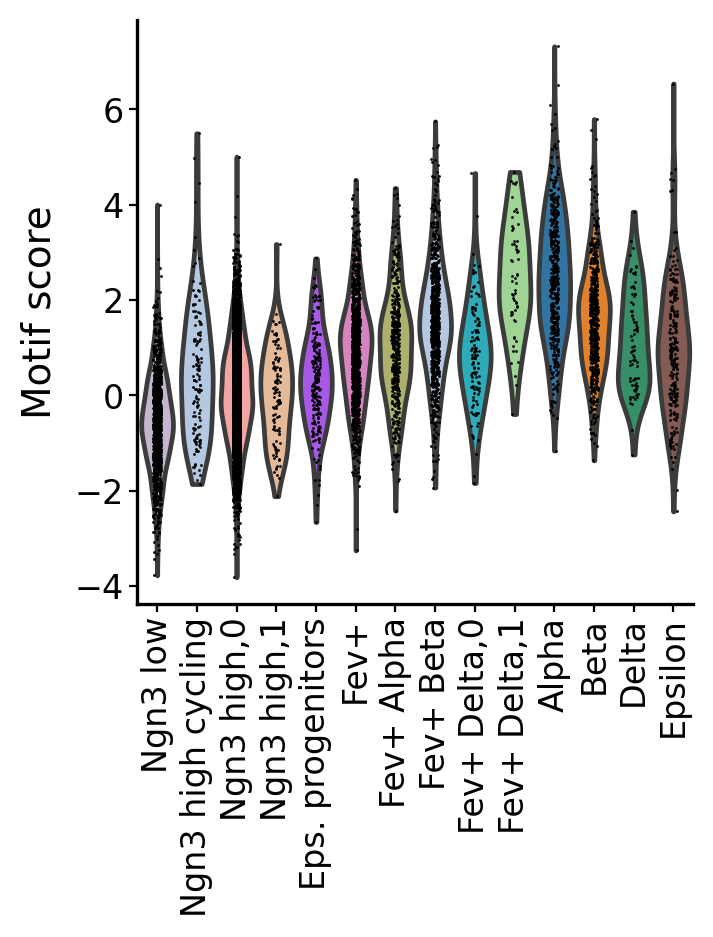

In [53]:
sc.pl.violin(tp0.adata, keys="M03318_2.00", groupby="refinement", ncols=1, rotation=90, ylabel="Motif score")

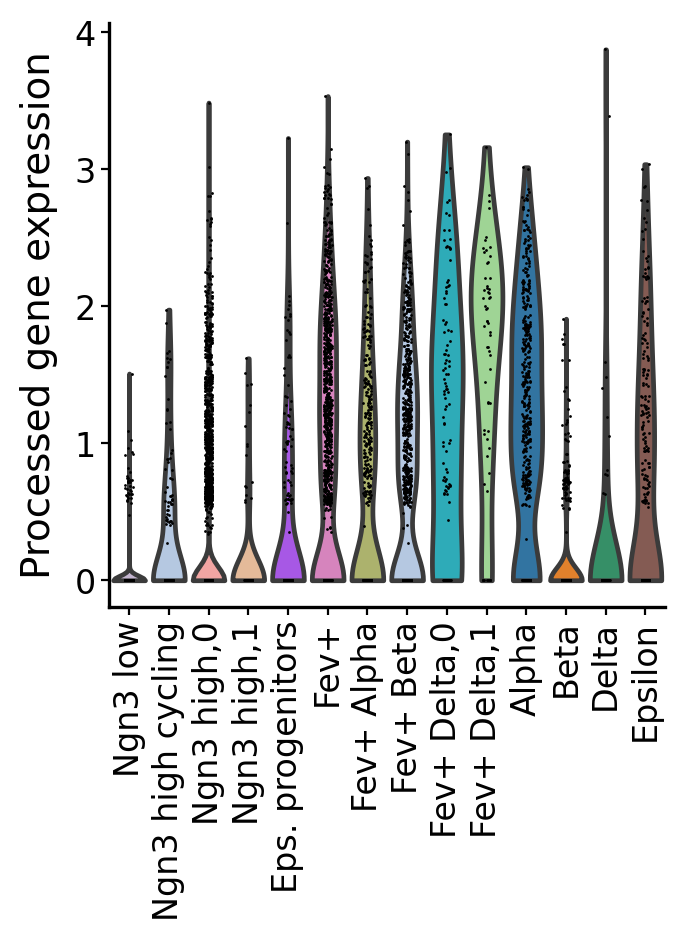

In [54]:
sc.pl.violin(tp0.adata, keys="Pou3f4", groupby="refinement", ncols=1, rotation=90, ylabel="Processed gene expression")

In [55]:
alpha_drivers.to_csv(os.path.join(output_dir, "driver_alpha_tfs.csv"))
df_alpha.to_csv(os.path.join(output_dir, "diff_motif_alpha.csv"))

# Epsilon

In [56]:
tp0.pull(14.5, 15.5, data="celltype", subset="Epsilon", key_added="Epsilon_pull")

In [57]:
eps_drivers = tp0.compute_feature_correlation(obs_key="Epsilon_pull", features="mouse", corr_method="pearson")
eps_drivers["total_counts"] = tp0.adata.var["total_counts"]
eps_drivers = eps_drivers[eps_drivers.total_counts > 200]
eps_drivers.head(n=10)

,Epsilon_pull_corr,Epsilon_pull_pval,Epsilon_pull_qval,Epsilon_pull_ci_low,Epsilon_pull_ci_high,total_counts
Arg1,0.437195,0.000000e+00,0.000000e+00,0.420666,0.453433,1861.0
Isl1,0.343821,1.590325e-263,1.055976e-260,0.325837,0.361557,28610.0
Nuak2,0.284609,1.960414e-176,8.678101e-174,0.265888,0.303116,267.0
Arx,0.269299,3.114796e-157,1.034112e-154,0.250411,0.287981,8805.0
Mctp2,0.256839,1.507590e-142,4.004159e-140,0.237822,0.275659,5659.0
Irx2,0.213610,7.822940e-98,1.731477e-95,0.194197,0.232856,1968.0
Peg3,0.198762,1.306189e-84,2.478027e-82,0.179230,0.218137,136951.0
A1cf,0.173710,1.155985e-64,1.918934e-62,0.153998,0.193284,5833.0
Zbtb16,0.157941,1.380134e-53,1.666198e-51,0.138130,0.177627,727.0
Tead1,0.149769,2.762717e-48,3.057407e-46,0.129910,0.169509,16244.0


In [58]:
ranks_eps = sc.get.rank_genes_groups_df(adata_chromvar, group="Epsilon")
df_eps = pd.merge(ranks_eps, motif2TF, left_on="names", right_on="Motif_ID")
df_eps.head(n=50)



,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
0,M09090_2.00,15.732492,2.619385,9.057419e-56,5.447132e-52,M09090_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"
1,M09088_2.00,15.569936,2.926883,1.165249e-54,3.503904e-51,M09088_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb2, Foxb1]"
2,M07961_2.00,15.403114,2.874019,1.559719e-53,1.876030e-50,M07961_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"
3,M07960_2.00,15.328778,2.554382,4.911402e-53,4.922862e-50,M07960_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"
4,M09545_2.00,15.284476,2.440185,9.703977e-53,8.337103e-50,M09545_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"
5,M07962_2.00,15.265537,2.975283,1.297554e-52,9.754365e-50,M07962_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"
6,M07959_2.00,15.203936,2.860432,3.329988e-52,2.002655e-49,M07959_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb2, Foxb1]"
7,M04818_2.00,15.159553,2.463815,6.551446e-52,3.283366e-49,M04818_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"
8,M08121_2.00,15.144138,2.708277,8.283324e-52,3.831993e-49,M08121_2.00,Foxa2,"[Foxa1, Foxa2, Foxa3, Foxb2, Foxb1]"
9,M08117_2.00,15.135502,2.554847,9.445707e-52,4.057606e-49,M08117_2.00,NaN,"[Foxa1, Foxa2, Foxa3, Foxb1]"


In [59]:
df_eps.loc[("Arg1" in df_eps.iloc[i]["TF_name"] for i in range(len(df_eps)))]

,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name


In [60]:
df_eps[df_eps.direct_TF=="Tead1"]

,names,scores,logfoldchanges,pvals,pvals_adj,Motif_ID,direct_TF,TF_name
373,M09438_2.00,6.378922,1.017763,1.783392e-10,8.684469e-10,M09438_2.00,Tead1,"[Tead4, Tead2, Tead1]"


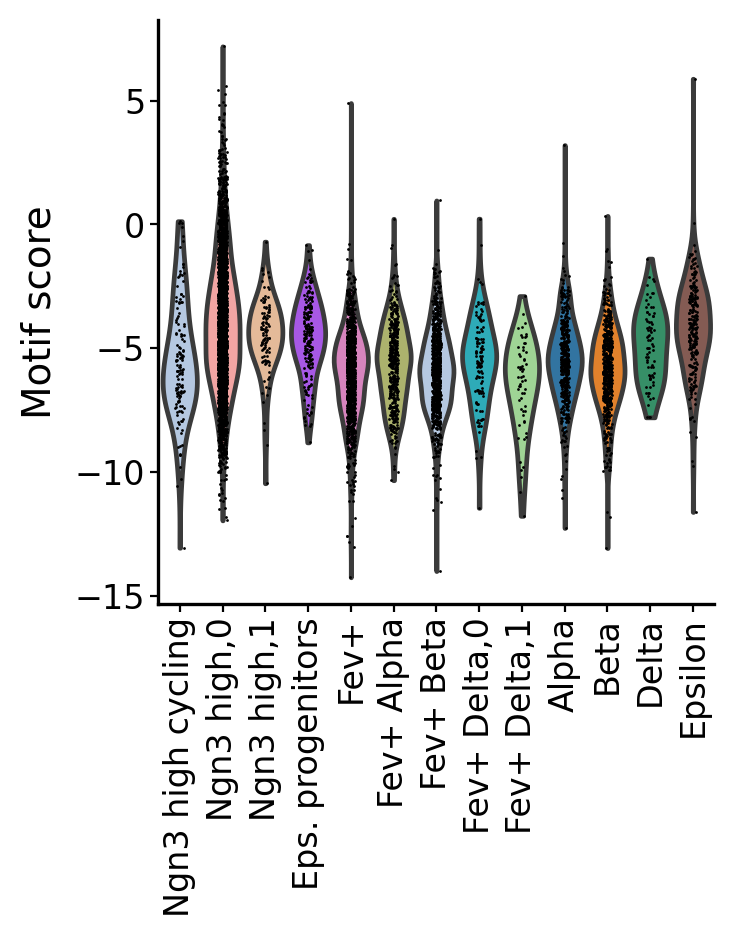

In [61]:
sc.pl.violin(tp0.adata[tp0.adata.obs["celltype"]!="Ngn3 low"], keys="M09438_2.00", groupby="refinement", ncols=1, rotation=90, ylabel="Motif score")

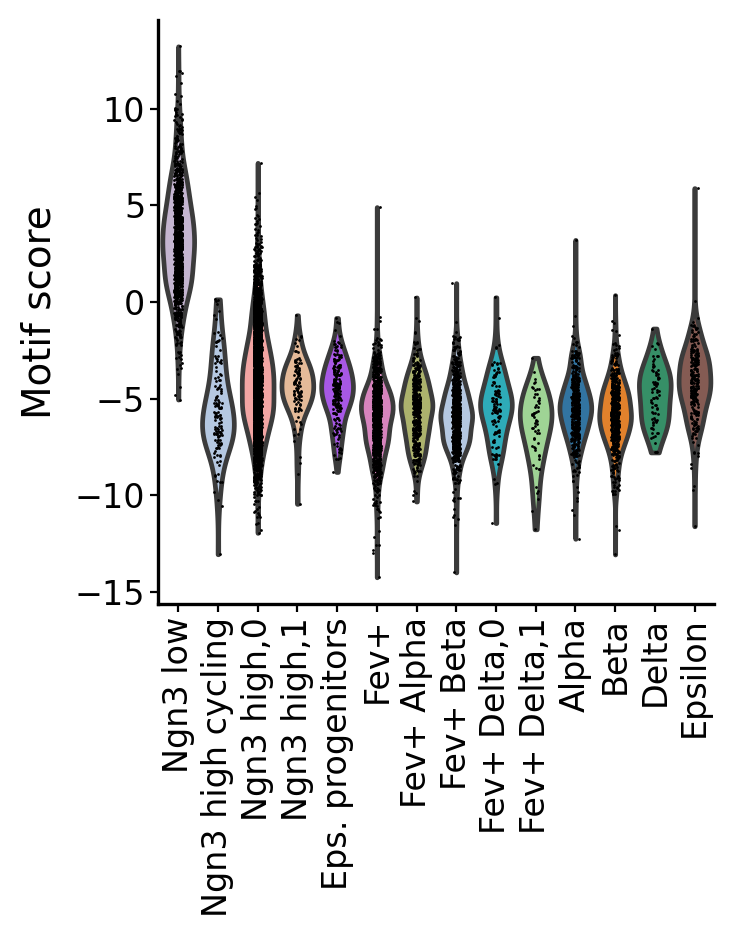

In [62]:
sc.pl.violin(tp0.adata, keys="M09438_2.00", groupby="refinement", ncols=1, rotation=90, ylabel="Motif score")

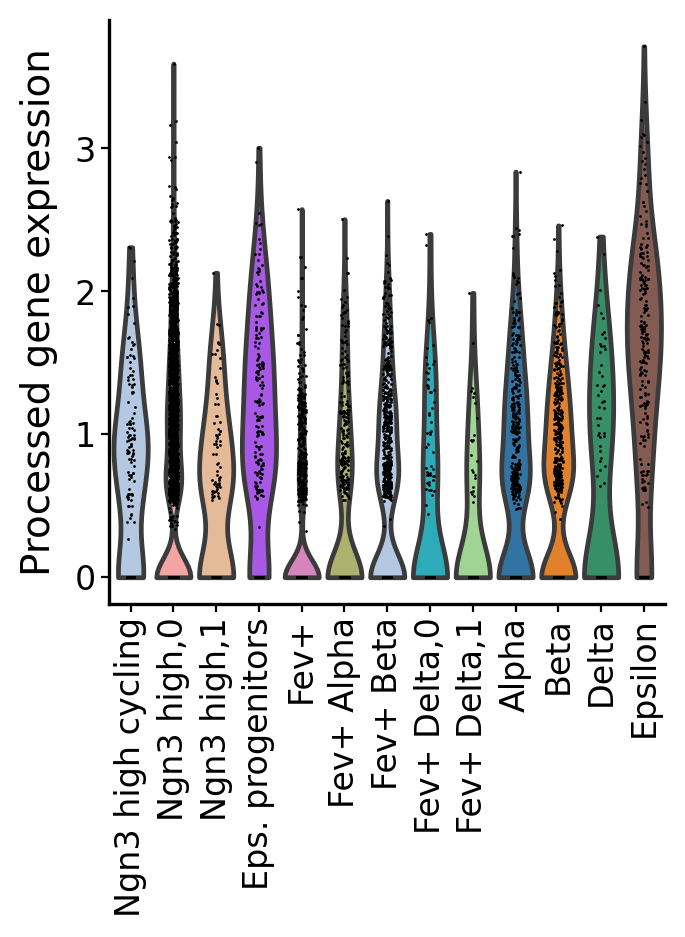

In [63]:
sc.pl.violin(tp0.adata[tp0.adata.obs["celltype"]!="Ngn3 low"], keys="Tead1", groupby="refinement", ncols=1, rotation=90, ylabel="Processed gene expression")

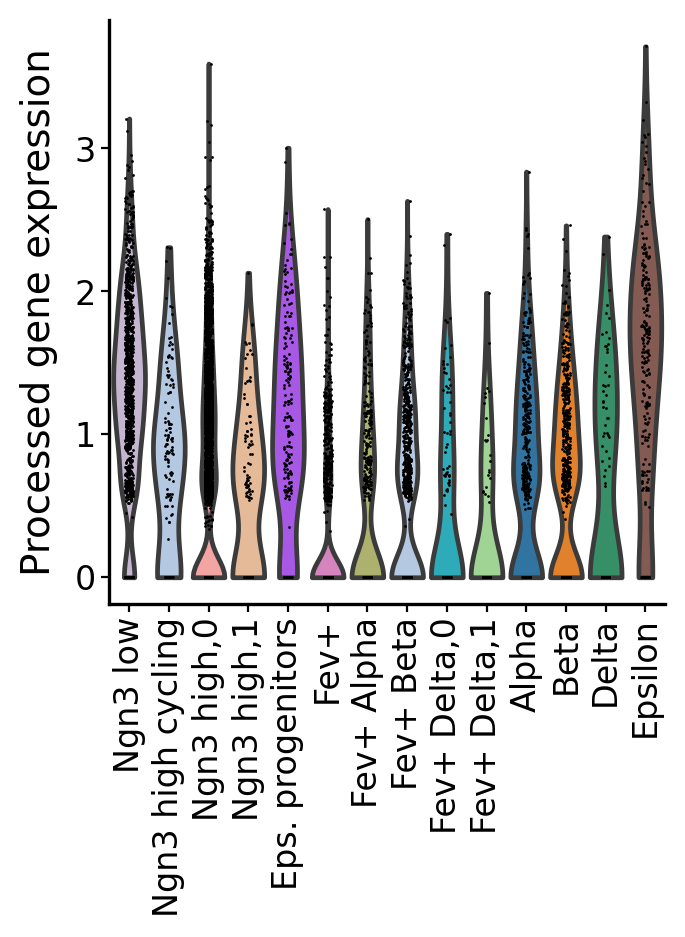

In [64]:
sc.pl.violin(tp0.adata, keys="Tead1", groupby="refinement", ncols=1, rotation=90, ylabel="Processed gene expression")

In [65]:
eps_drivers.to_csv(os.path.join(output_dir, "driver_eps_tfs.csv"))
df_eps.to_csv(os.path.join(output_dir, "diff_motif_eps.csv"))